In [7]:
from PIL import Image

# Question 1

In [10]:
image = Image.open("/content/lenna_image.png")

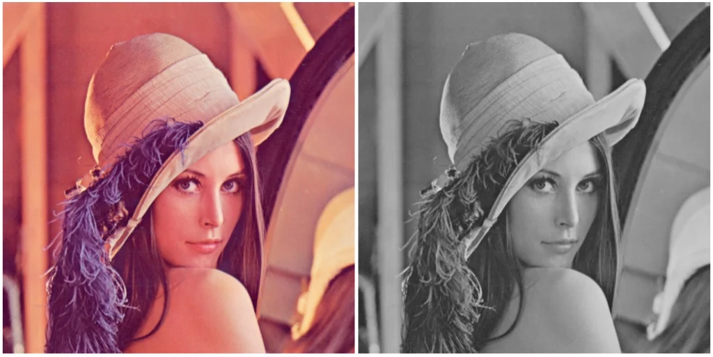

In [13]:
display(image)

# Question 2

In [25]:
import numpy as np
image_array = np.array(image)

In [32]:
image_array

array([[[253, 255, 255, 255],
        [254, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 254, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[253, 255, 255, 255],
        [252, 253, 254, 255],
        [254, 248, 249, 255],
        ...,
        [249, 249, 249, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[253, 255, 255, 255],
        [254, 252, 253, 255],
        [240, 220, 220, 255],
        ...,
        [218, 218, 218, 255],
        [255, 255, 255, 255],
        [253, 252, 253, 255]],

       ...,

       [[255, 255, 251, 255],
        [255, 255, 254, 255],
        [254, 255, 255, 255],
        ...,
        [254, 254, 254, 255],
        [253, 253, 253, 255],
        [254, 254, 254, 255]],

       [[255, 255, 251, 255],
        [255, 255, 254, 255],
        [253, 255, 255, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[254

In [33]:
row_col_100 = image_array[:100 , :100 , :]

In [34]:
cropped_image = Image.fromarray(row_col_100)

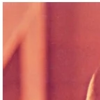

In [35]:
display(cropped_image)

# Question 3

In [42]:
image_array_colored = np.array(image)

array([[253, 254, 255, ..., 255, 255, 255],
       [253, 252, 254, ..., 249, 254, 254],
       [253, 254, 240, ..., 218, 255, 253],
       ...,
       [255, 255, 254, ..., 254, 253, 254],
       [255, 255, 253, ..., 254, 254, 254],
       [254, 255, 254, ..., 255, 255, 255]], dtype=uint8)
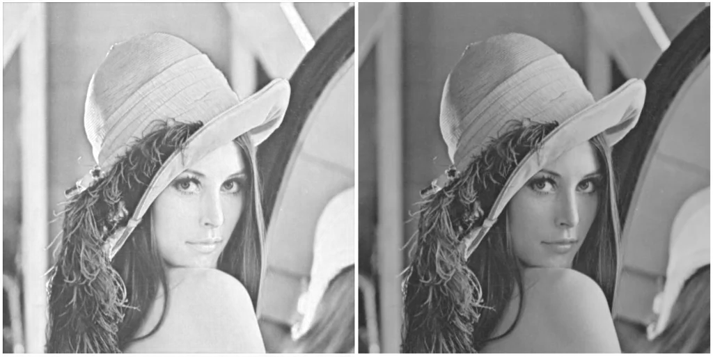

In [55]:
red_channel = image_array_colored[: , : , 0]
display(red_channel)

array([[255, 255, 255, ..., 254, 255, 255],
       [255, 253, 248, ..., 249, 254, 254],
       [255, 252, 220, ..., 218, 255, 252],
       ...,
       [255, 255, 255, ..., 254, 253, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 254, ..., 255, 255, 255]], dtype=uint8)
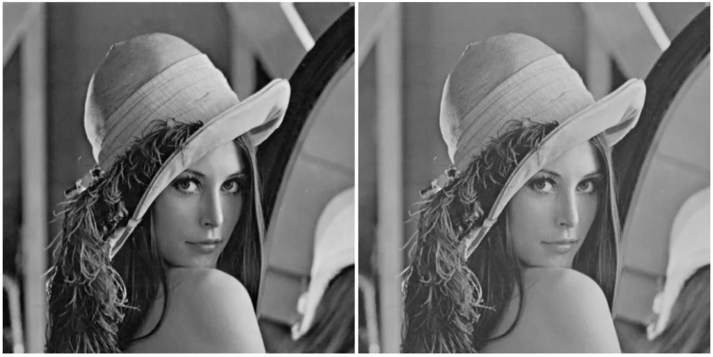

In [56]:
green_channel = image_array_colored[: , : , 1]
display(green_channel)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 254, 249, ..., 249, 254, 254],
       [255, 253, 220, ..., 218, 255, 253],
       ...,
       [251, 254, 255, ..., 254, 253, 254],
       [251, 254, 255, ..., 254, 254, 254],
       [253, 254, 254, ..., 255, 255, 255]], dtype=uint8)
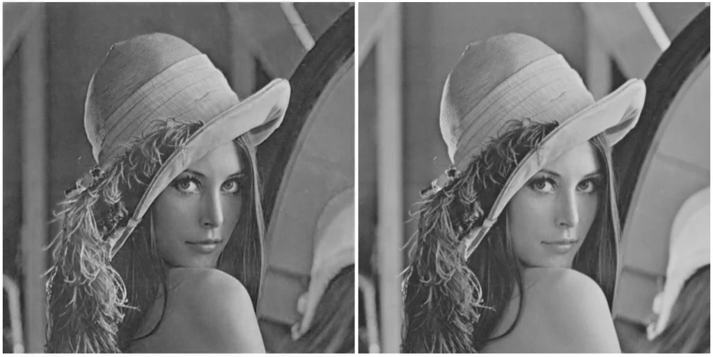

In [57]:
blue_channel = image_array_colored[: , : , 2]
display(blue_channel)

# Question 4

In [61]:
# modified_array = []
# for index,data in row_col_100:
#   modified_array[index] = []

array([[253, 255, 255, 255],
       [254, 255, 255, 255],
       [255, 255, 255, 255],
       [252, 255, 251, 255],
       [252, 255, 251, 255],
       [252, 255, 252, 255],
       [252, 254, 253, 255],
       [252, 255, 251, 255],
       [252, 255, 251, 255],
       [252, 255, 251, 255],
       [252, 254, 251, 255],
       [253, 254, 249, 255],
       [253, 254, 248, 255],
       [253, 254, 249, 255],
       [254, 253, 250, 255],
       [255, 254, 251, 255],
       [255, 254, 252, 255],
       [255, 254, 253, 255],
       [255, 254, 254, 255],
       [255, 255, 253, 255],
       [255, 254, 255, 255],
       [255, 254, 255, 255],
       [255, 254, 255, 255],
       [255, 254, 255, 255],
       [255, 254, 255, 255],
       [255, 254, 255, 255],
       [255, 255, 253, 255],
       [255, 254, 252, 255],
       [254, 253, 251, 255],
       [253, 254, 249, 255],
       [253, 254, 249, 255],
       [252, 254, 250, 255],
       [252, 254, 250, 255],
       [253, 255, 252, 255],
       [253, 2

# PCA

In [62]:
image = Image.open("/content/lenna_image.png").convert("L")

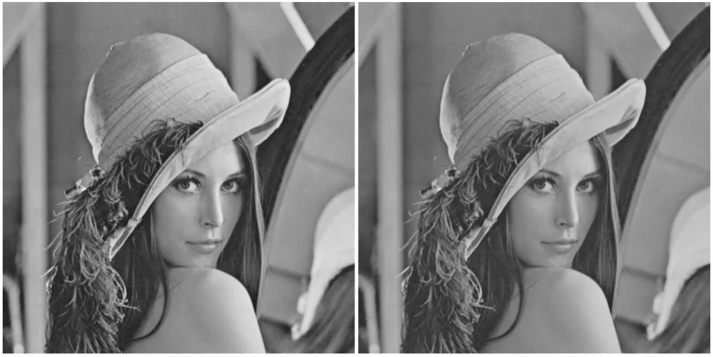

In [63]:
display(image)

In [65]:
image_array = np.array(image)

In [66]:
height , width = image_array . shape

In [67]:
data = image_array . reshape ( height , width )

In [68]:
mean = np . mean ( data , axis =0)

In [69]:
centered_data = data - mean

In [70]:
cov_matrix = np . cov ( centered_data , rowvar = False )

In [71]:
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )

In [73]:
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

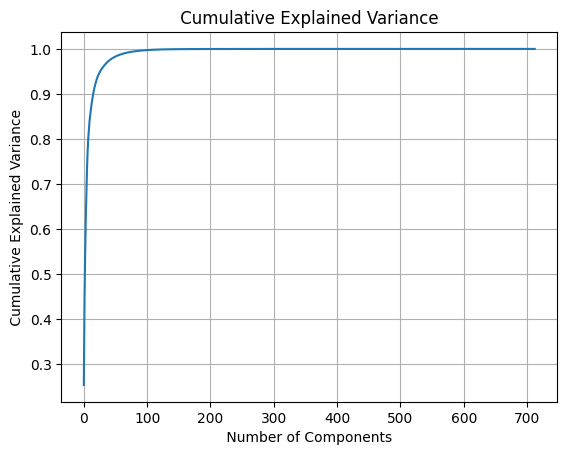

In [76]:
import matplotlib . pyplot as plt

explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [77]:
k = 50 # Choose k principal components
components = eigenvectors [: , : k ]

In [79]:
compressed_data = np . dot ( centered_data , components )

In [87]:
decompressed_data = np . dot ( compressed_data , components . T ) +mean

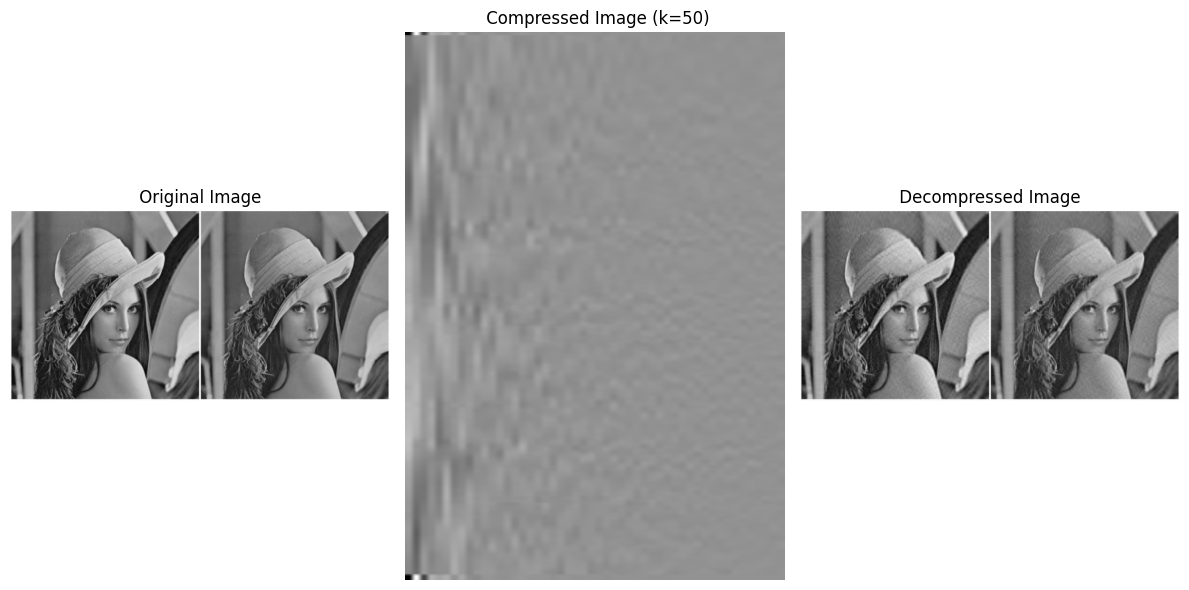

In [88]:
plt . figure ( figsize =(12 , 6) )
# Original Image
plt . subplot (1 , 3 , 1)
plt . imshow ( image_array , cmap ="gray")
plt . title (" Original Image ")
plt . axis ("off")
plt . subplot (1 , 3 , 2)
plt . imshow ( compressed_data , cmap ="gray", aspect ="auto")
plt . title ( f" Compressed Image (k={k})")
plt . axis ("off")
# Decompressed Image
plt . subplot (1 , 3 , 3)
plt . imshow ( decompressed_data , cmap ="gray")
plt . title (" Decompressed Image ")
plt . axis ("off")
plt . tight_layout ()
plt . show ()